# ArXiv Citation Network

### Author: Dennis NUNEZ FERNANDEZ

## Load libraries

In [1]:
# Installing addional libraries

#!pip install powerlaw

In [2]:
# Importing libraries

import pandas as pd
import networkx as nx
import collections
import statistics as stats
import time
import seaborn as sns
import json
import numpy as np
import random  
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import powerlaw 
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

## Loading Data

In [3]:
# Reading the json file

f = open("data/internal-references-pdftotext.json")
data = json.load(f)

In [4]:
# Show how the data is presented

data

{'plasm-ph/9607002': [],
 'plasm-ph/9607001': [],
 'plasm-ph/9512001': [],
 'plasm-ph/9512002': [],
 'plasm-ph/9503001': [],
 'plasm-ph/9503002': [],
 'plasm-ph/9604002': [],
 'plasm-ph/9604001': [],
 'plasm-ph/9604003': [],
 'plasm-ph/9507002': [],
 'plasm-ph/9507001': [],
 'plasm-ph/9602001': [],
 'plasm-ph/9602003': [],
 'plasm-ph/9602002': [],
 'plasm-ph/9608002': [],
 'plasm-ph/9608001': [],
 'plasm-ph/9609002': [],
 'plasm-ph/9609001': [],
 'plasm-ph/9511002': [],
 'plasm-ph/9511001': [],
 'plasm-ph/9502001': [],
 'plasm-ph/9502002': [],
 'plasm-ph/9502003': [],
 'plasm-ph/9506003': [],
 'plasm-ph/9506004': [],
 'plasm-ph/9506001': [],
 'alg-geom/9211001': [],
 'alg-geom/9209001': [],
 'alg-geom/9412013': [],
 'alg-geom/9412011': [],
 'alg-geom/9412002': [],
 'alg-geom/9412007': [],
 'alg-geom/9412010': ['alg-geom/9509005'],
 'alg-geom/9412020': ['alg-geom/9505009'],
 'alg-geom/9412012': ['alg-geom/9407002'],
 'alg-geom/9412009': [],
 'alg-geom/9412022': [],
 'alg-geom/9412005': 

In [5]:
# Length of the data

orig_len = len(data)
print(orig_len)

1354753


In [6]:
# Get N elements in the dictionary, because of limited computational resources

n_sample = 50000   #20000
data = dict(random.sample(data.items(), n_sample))  
#data = dict(list(data.items())[:n_sample])  #first elements
#data = data  #all the data
print("Working with the "+str(round(100*len(data)/orig_len,2))+"% of the original data")

Working with the 3.69% of the original data


## Some Pre-Processing

In [7]:
# Consider only papers with more than 4 citations

keys = []
for key, value in data.items():
    if len(value) >= 4:
        keys.append(key)

data = { your_key: data[your_key] for your_key in keys }

In [8]:
data

{'1810.12320': ['1810.00625', '1710.07696', '1308.1610', '1507.02678'],
 '1502.07690': ['0805.3898',
  '1103.3232',
  '1407.7540',
  '1311.4882',
  'cond-mat/9906453',
  '0805.2960',
  '1403.6047',
  '1003.0010',
  '1403.4279',
  '1008.0210',
  '1408.5911',
  '0803.3483',
  '0808.1725',
  'hep-th/0405231',
  'hep-th/9902121',
  '0908.3677',
  '1305.3925'],
 '1110.0410': ['0805.3750', '1108.3121', '1003.3486', '1011.2267'],
 'hep-ph/9810535': ['hep-th/9809124',
  'hep-ph/9803466',
  'hep-ph/9810361',
  'hep-th/9603133',
  'hep-ph/9810280',
  'hep-th/9710208',
  'hep-ph/9809406',
  'hep-ph/9810410',
  'hep-ph/9508258',
  'hep-th/9609046',
  'hep-th/9706500',
  'hep-ph/9702237',
  'hep-ph/9807415',
  'hep-th/9704177',
  'hep-th/9809147',
  'hep-th/9709043',
  'hep-th/9810155',
  'hep-th/9711197',
  'hep-ph/9809582',
  'hep-th/9707208',
  'hep-th/9707143',
  'hep-th/9709049',
  'hep-th/9808139',
  'hep-th/9711158',
  'hep-ph/9804398',
  'hep-ph/9807522',
  'hep-ph/9803315',
  'hep-th/98040

In [9]:
# Construct the dataframe

papers_main = []
papers_refs = []

for key in data:
    if len(data[key])!=0:
        #print("")
        #print(key, "->", data[key])
        for _ in range(len(data[key])):
            #print(key, data[key][_])
            papers_main.append(key)
            papers_refs.append(data[key][_])

# Sanity check
print(len(papers_main))
print(len(papers_refs))

# The TOP papers are the cited and the SUB, the ones that cited
df = pd.DataFrame({'top':papers_refs, 'sub':papers_main})

# Sanity check
print(len(df))

222499
222499
222499


In [10]:
df

top         sub
0       1810.00625  1810.12320
1       1710.07696  1810.12320
2        1308.1610  1810.12320
3       1507.02678  1810.12320
4        0805.3898  1502.07690
...            ...         ...
222494  1703.00912  1810.01882
222495   0912.3495   1007.0213
222496   0802.4171   1007.0213
222497   1003.1241   1007.0213
222498   0804.3170   1007.0213

[222499 rows x 2 columns]

In [11]:
# Remove duplicates rows

df = df.drop_duplicates(keep=False, inplace=False)

In [12]:
df

top         sub
0       1810.00625  1810.12320
1       1710.07696  1810.12320
2        1308.1610  1810.12320
3       1507.02678  1810.12320
4        0805.3898  1502.07690
...            ...         ...
222494  1703.00912  1810.01882
222495   0912.3495   1007.0213
222496   0802.4171   1007.0213
222497   1003.1241   1007.0213
222498   0804.3170   1007.0213

[222499 rows x 2 columns]

In [13]:
# Consider only the TOP papers that cite other papers, not those that do not cite any other paper

intersection = list(set(list(df["top"])).intersection(list(df["sub"])))

papers_top = []
papers_sub = []
for idx in range(0,len(df)):
    if (df["top"].iloc[idx] in intersection):
        papers_top.append(df["top"].iloc[idx])
        papers_sub.append(df["sub"].iloc[idx])

df = pd.DataFrame({'top':papers_top, 'sub':papers_sub})

In [14]:
df

top              sub
0           1404.5963        1407.3056
1      hep-ph/9710473        1202.1503
2           1105.5121        1202.1503
3     nucl-th/0304013   hep-ph/0404125
4           0911.0802        1108.1849
...               ...              ...
5749  hep-lat/0308019  hep-lat/0511021
5750        1106.2540        1308.1096
5751        0806.0971        1211.1571
5752        1210.7114       1810.01882
5753       1501.07803       1810.01882

[5754 rows x 2 columns]

In [15]:
# Saving for later use in Cytoscape

df.to_csv("cytoscape/citations_network.csv", sep='\t', encoding='utf-8', index=False)

## Creation of the Citation Network

In [16]:
GG = nx.from_pandas_edgelist(df, source="top",
                              target="sub", edge_attr=None,
                              create_using=nx.DiGraph())
print(nx.info(GG))

Name: 
Type: DiGraph
Number of nodes: 4982
Number of edges: 5754
Average in degree:   1.1550
Average out degree:   1.1550


## Selection of the largest Weakly Connected Components in Citation Network

Weakly Connected Components: Group all the nodes in the graph that can access all of the nodes in the group throught undirected edges (lines)

In [17]:
GG_cc = max(nx.weakly_connected_components(GG), key=len)
GG = GG.subgraph(GG_cc)

In [18]:
print(nx.info(GG))

Name: 
Type: DiGraph
Number of nodes: 3252
Number of edges: 4616
Average in degree:   1.4194
Average out degree:   1.4194


## Visualization of the Citation Network using NetworkX

Warning: This step takes a loong time

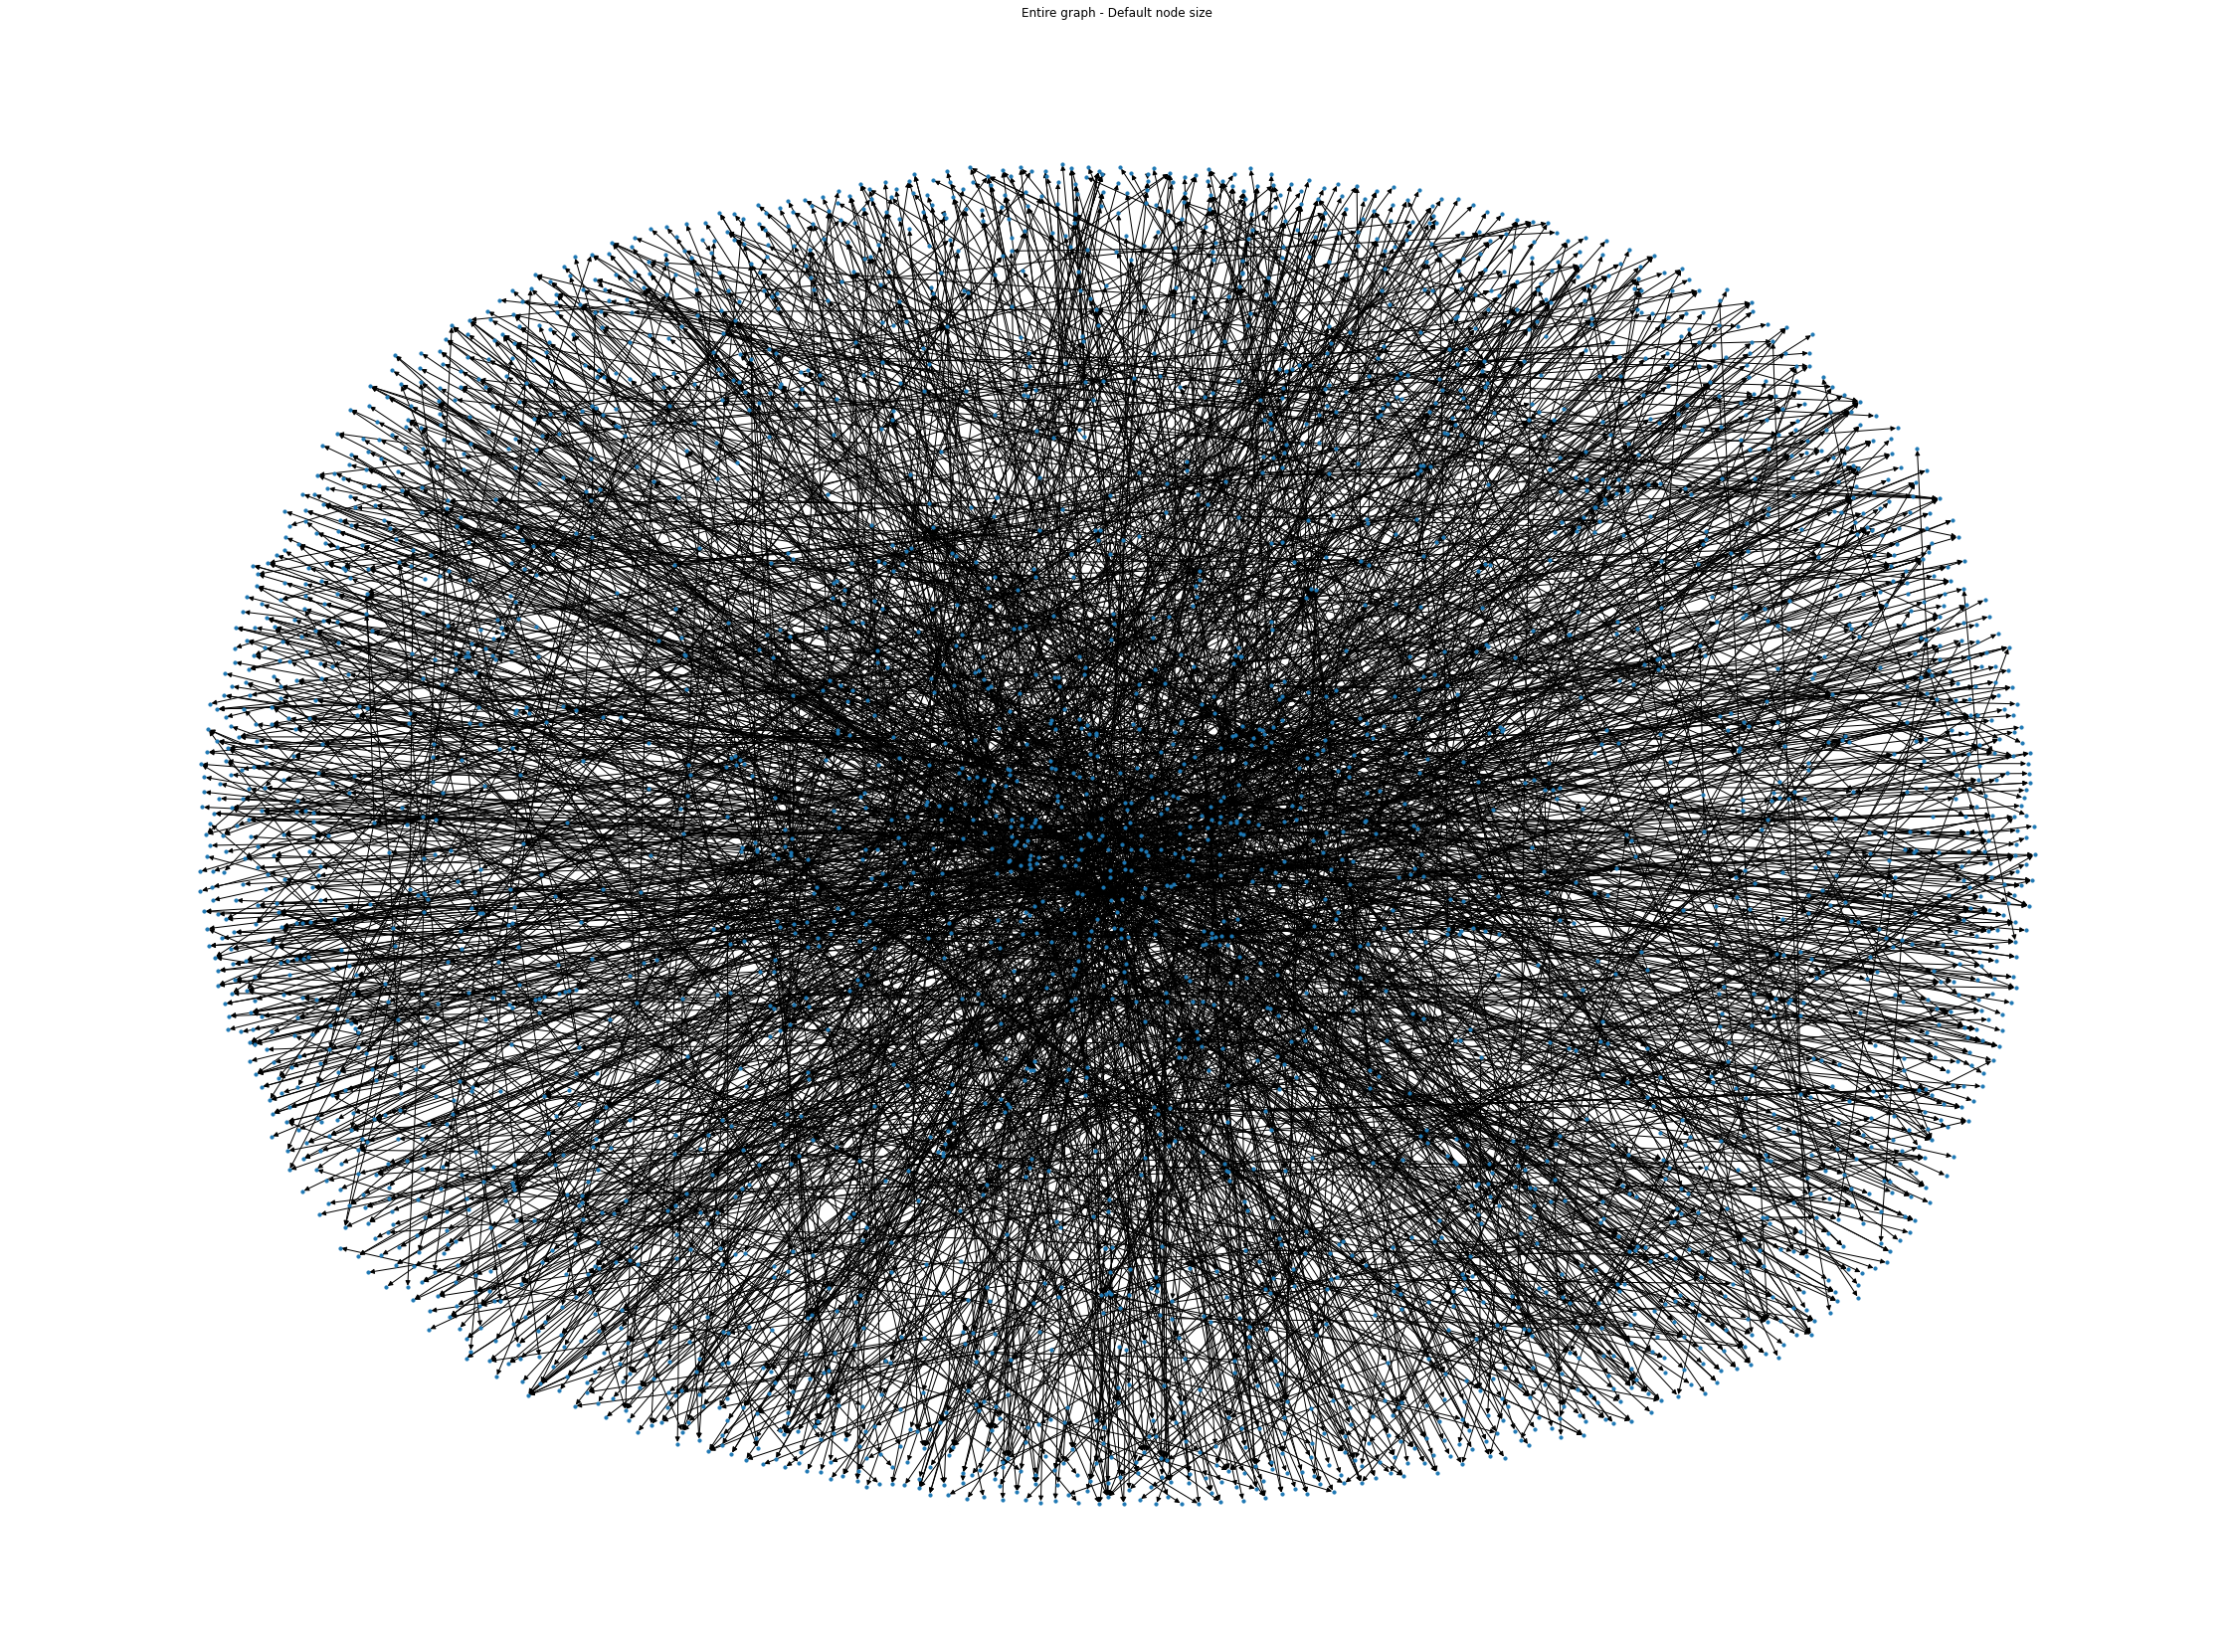

In [19]:
# The direction of the arrow indicates flow of information 
# from the cited paper (beginning of the arrow) to the citing paper (end of the arrow)

spring_pos = nx.spring_layout(GG) # might take a little while
fig = plt.figure(figsize = (40, 30))
ax = fig.add_subplot(111)
ax.axis('off')

nx.draw_networkx(GG, spring_pos, ax = ax, node_size = 10, width = 1, with_labels = False)
plt.title("Entire graph - Default node size")
plt.close();

fig

## Review of the power law-distribution

**i) Recognizing  that is a power-law distribution:**

- Distribution is right skewed
- High ratio of max to min

**ii) Discrete probability power law-distribution, indexed by the degree value k (k greater than $k_{min})$**

$p(k) = \frac{\alpha-1}{k_{min}}.(\frac{k}{k_{min}})^{-\alpha}$

- $\alpha$ is the power in the **power-law**
- $k_{min}$ is the minimum degree for which the **discrete probability law** applies

Let us take the logarithm on each side. What does that lead to?

For degree k greater than $k_{min}$:
$log(p(k)) = log(\frac{\alpha-1}{k_{min}}) - \alpha.log(\frac{k}{k_{min}})$

The above expression is linear in $log(\frac{k}{k_{min}})$.

**iii) Analogy with linear function: y = cx + b**

- $y = log(p(k))$
- $x = log(\frac{k}{k_{min}})$ 
- Intercept: $b = log(\frac{\alpha-1}{k_{min}})$
- Slope: $c = -\alpha$

## In-degree distribution and fitting by a power-law distribution

In [20]:
# Calculating the in-degree

GGs = [d for d in list(set(list(GG.nodes)))]
GGs_in_degrees = [GG.in_degree[d] for d in GGs]

GGs_in_order = [x for y, x in sorted(zip(GGs_in_degrees, GGs), reverse=True)]
GGs_in_degrees_order = sorted((GG.in_degree[d] for d in GGs), reverse=True)

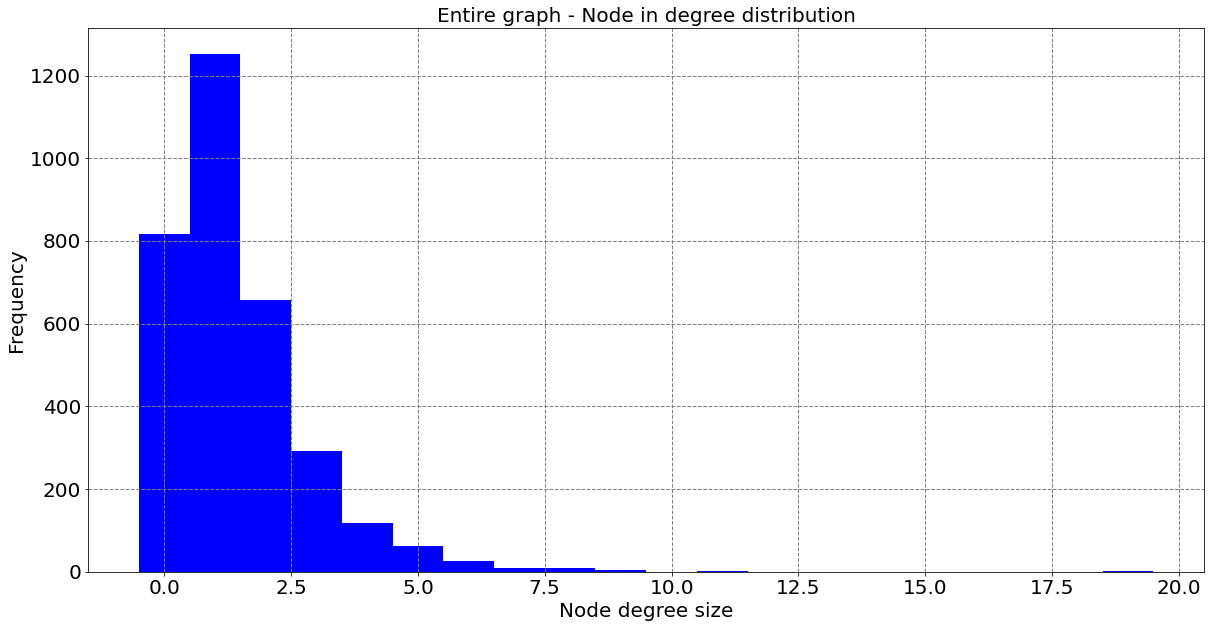

In [21]:
# Plotting the in-degree distribution

degree_count = collections.Counter(GGs_in_degrees_order)
deg, cnt = zip(*degree_count.items())

plt.figure(figsize=(20,10))

plt.bar(deg, cnt, width=1, color='b')
plt.xlabel("Node degree size", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Entire graph - Node in degree distribution", fontsize=20)
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.rc('axes', axisbelow=True)
plt.show()

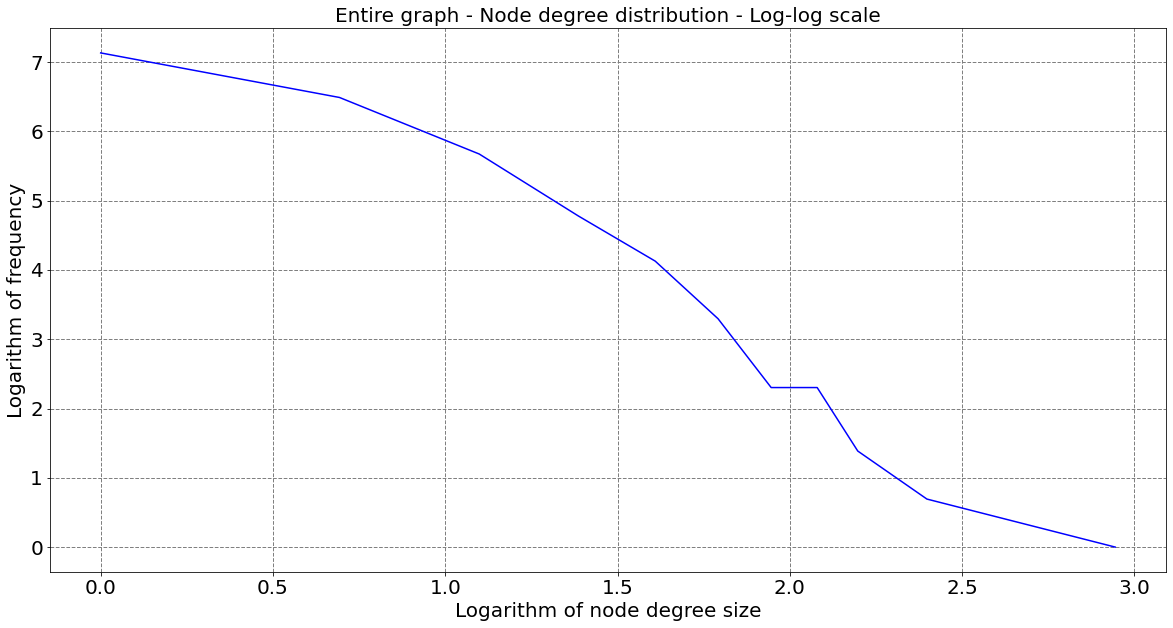

In [22]:
# It should look linear on a log-log scale

log_deg = np.log(deg)
log_cnt = np.log(cnt)

plt.figure(figsize=(20,10))

plt.plot(log_deg, log_cnt, color='b')
plt.xlabel('Logarithm of node degree size', fontsize=20)
plt.ylabel('Logarithm of frequency', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Entire graph - Node degree distribution - Log-log scale", fontsize=20)
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.rc('axes', axisbelow=True)
plt.show()

In [23]:
# Fitting a power law distribution

In [24]:
# Power laws are probability distributions with the form:p(x)∝x−α

# Used for degree distribution and powerlaw test
in_degree_sequence = sorted([d for n, d in GG.in_degree()], reverse=True) 

fit = powerlaw.Fit(in_degree_sequence) 

Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


In [25]:
print("alpha:", round(fit.power_law.alpha,3))
print("Kmin:", round(fit.power_law.xmin,3))

alpha: 9.616
Kmin: 8.0


In [26]:
print("Intercept:", round(np.log((fit.power_law.alpha-1)/fit.power_law.xmin),3))
print("Slope:", round(-1*fit.power_law.alpha,3))

Intercept: 0.074
Slope: -9.616


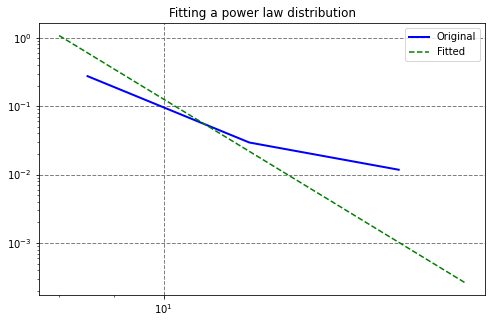

In [27]:
# Plotting the fitted a power law distribution

plt.figure(figsize=(8, 5))
fig2 = fit.plot_pdf(color='b', linewidth=2, label='Original')
fig2 = fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig2, label='Fitted')
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.title("Fitting a power law distribution")
plt.rc('axes', axisbelow=True)
plt.legend()

In [28]:
R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print("R:", R)
print("p:", p)

R: 2.491743211972677
p: 0.012711790356780526


Discussion: As can be seen above, the in degree distribution has the following characteristics: the distribution is right skewed and has a high ratio of max to min. This gives us an indication that it can be very well matched with a power-law distribution. And indeed, in the above procedure it is verified that the in degree distribution fits very well with a power-law distribution. In fact, the likelihood ratio test comparisons produces a pair (R,p), where r is the normalized log likelihood ratio and p is the statistical significance of that ratio. So, being tested for the p-value is whether the sign of r is meaningful. As we can see, we obtained a p<0.05 for a likelihood ratio test, this indicates that the power-law model is favored.

## Out-degree distribution and fitting by a power-law distribution

In [29]:
# Calculating the out-degree

GGs = [d for d in list(set(list(GG.nodes)))]
GGs_out_degrees = [GG.out_degree[d] for d in GGs]

GGs_out_order = [x for y, x in sorted(zip(GGs_out_degrees, GGs), reverse=True)]
GGs_out_degrees_order = sorted((GG.out_degree[d] for d in GGs), reverse=True)

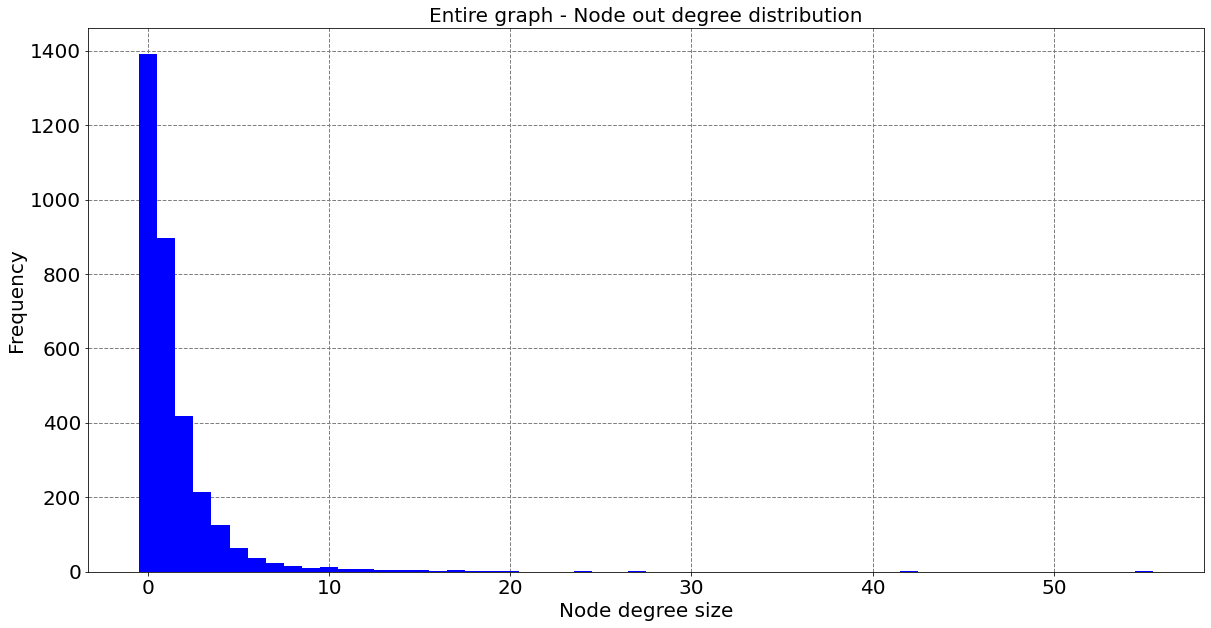

In [30]:
# Plotting the out-degree distribution

degree_count = collections.Counter(GGs_out_degrees_order)
deg, cnt = zip(*degree_count.items())

plt.figure(figsize=(20,10))

plt.bar(deg, cnt, width=1, color='b')
plt.xlabel("Node degree size", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Entire graph - Node out degree distribution", fontsize=20)
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.rc('axes', axisbelow=True)
plt.show()

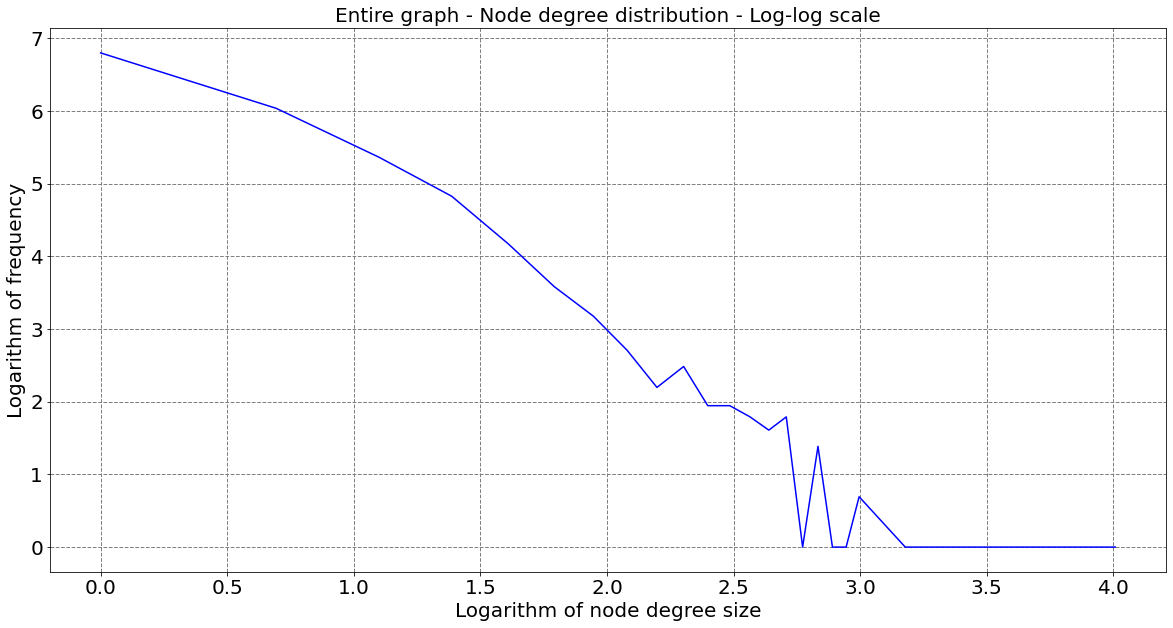

In [31]:
# It should look linear on a log-log scale

log_deg = np.log(deg)
log_cnt = np.log(cnt)

plt.figure(figsize=(20,10))

plt.plot(log_deg, log_cnt, color='b')
plt.xlabel('Logarithm of node degree size', fontsize=20)
plt.ylabel('Logarithm of frequency', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Entire graph - Node degree distribution - Log-log scale", fontsize=20)
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.rc('axes', axisbelow=True)
plt.show()

In [32]:
# Fitting a power law distribution

In [33]:
# Power laws are probability distributions with the form:p(x)∝x−α

# Used for degree distribution and powerlaw test
out_degree_sequence = sorted([d for n, d in GG.out_degree()], reverse=True) 

fit = powerlaw.Fit(out_degree_sequence) 

Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


In [34]:
print("alpha:", round(fit.power_law.alpha,3))
print("Kmin:", round(fit.power_law.xmin,3))

alpha: 4.733
Kmin: 13.0


In [35]:
print("Intercept:", round(np.log((fit.power_law.alpha-1)/fit.power_law.xmin),3))
print("Slope:", round(-1*fit.power_law.alpha,3))

Intercept: -1.248
Slope: -4.733


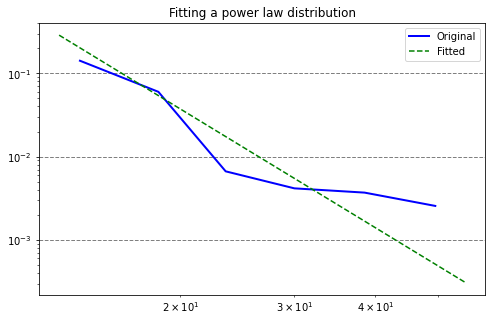

In [36]:
# Plotting the fitted a power law distribution

plt.figure(figsize=(8, 5))
fig2 = fit.plot_pdf(color='b', linewidth=2, label='Original')
fig2 = fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig2, label='Fitted')
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.title("Fitting a power law distribution")
plt.rc('axes', axisbelow=True)
plt.legend()

In [37]:
R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print("R:", R)
print("p:", p)

R: 2.060881065781085
p: 0.03931438808160971


Discussion: As can be seen above, the out degree distribution has the following characteristics: the distribution is right skewed and has a high ratio of max to min. This gives us an indication that it can be very well matched with a power-law distribution. And indeed, in the above procedure it is verified that the out degree distribution fits very well with a power-law distribution. In fact, the likelihood ratio test comparisons produces a pair (R,p), where r is the normalized log likelihood ratio and p is the statistical significance of that ratio. So, being tested for the p-value is whether the sign of r is meaningful. As we can see, we obtained a p<0.05 for a likelihood ratio test, this indicates that the power-law model is favored.

## Reading additional data for ArXiv ID and Paper Title

In [38]:
# Read the ids and titles from "data/oai-arxiv-metadata-hash-abstracts-2019-03-01.json"

#filename = "data/oai-arxiv-metadata-hash-abstracts-2019-03-01.json"
#with open(filename) as f:
#    info_ = [json.loads(line) for line in f]
#info_aXv = pd.DataFrame.from_dict(info_)
#info_aXv = pd.DataFrame({'idAxv':info_aXv["id"], 'title':info_aXv["title"]})
#info_aXv["idAxv"] = info_aXv["idAxv"].apply(lambda x: "x"+str(x))
#info_aXv["title"] = info_aXv["title"].apply(lambda x: x.translate({ord("\n"):None}))
#info_aXv.to_csv("data/infos_idd_names.csv", sep='\t', encoding='utf-8', index=False) # save for future use

In [39]:
# Read the ids and titles from "data/infos_idd_names.csv"

filename = "data/infos_idd_names.csv"
info_aXv = pd.read_csv(filename, sep='\t', index_col=0)
info_aXv.reset_index(inplace=True)
info_aXv["idAxv"] = info_aXv["idAxv"].apply(lambda x: x[1:])

## Measurement of Centralities in the Citation Network

In [40]:
def draw(G, pos, measures, measure_name):
    
    plt.figure(figsize = (40, 30))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=90, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    #labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)
    
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [41]:
def sorting(cetralts, n_tops):
    cetralts_tops = sorted(cetralts.items(), key=lambda item: item[1], reverse=True)[:n_tops]
    return cetralts_tops

In [42]:
def infos(centrs_tops):
    top_i = 1
    for idd,val in centrs_tops:
        print("Top",str(top_i), ", Id arXiv:", idd, ", Centrality:",round(val,4))
        print("Title:", info_aXv[info_aXv["idAxv"]==idd]["title"].values[0],"\n")
        top_i += 1

## Best centrality for find the 10 most influential papers in arXiv

The most important centrality is PageRank, because this measure uncovers nodes whose influence extends beyond their direct connections into the wider network.

In [43]:
# Page rank centrality
page_rank = nx.pagerank(GG, alpha = 0.85)
page_rank_tops = sorting(page_rank, 10)
infos(page_rank_tops)

Top 1 , Id arXiv: 1708.08404 , Centrality: 0.0028
Title: Spinning AdS Loop Diagrams: Two Point Functions 

Top 2 , Id arXiv: 1708.08668 , Centrality: 0.0028
Title: Feynman rules for higher-spin gauge fields on AdS$_{d+1}$ 

Top 3 , Id arXiv: 1606.08429 , Centrality: 0.0026
Title: Infrared Computations of Defect Schur Indices 

Top 4 , Id arXiv: 1704.01955 , Centrality: 0.0025
Title: Surface Defects and Chiral Algebras 

Top 5 , Id arXiv: 0905.3532 , Centrality: 0.002
Title: Horava-Lifshitz Dark Energy 

Top 6 , Id arXiv: 1803.04741 , Centrality: 0.002
Title: Chern-Weil theorem, Lovelock Lagrangians in critical dimensions and  boundary terms in gravity actions 

Top 7 , Id arXiv: 0910.0594 , Centrality: 0.002
Title: Cosmic strings in a model of non-relativistic gravity 

Top 8 , Id arXiv: 1009.3398 , Centrality: 0.0019
Title: Large Dimuon Asymmetry In Bs-bar B_s Mixing From Unparticle Indced  Gamma^{12}_s 

Top 9 , Id arXiv: 1709.06478 , Centrality: 0.0019
Title: Einstein-Gauss-Bonnet t

In [44]:
#draw(GG, nx.spring_layout(GG), nx.pagerank(GG, alpha = 0.85), 'Page Rank Centrality')

## Measurement of additional centralities for the Citation Network

In [45]:
# In degree centrality
in_deg = nx.in_degree_centrality(GG)
in_deg_tops = sorting(in_deg, 10)
infos(in_deg_tops)

Top 1 , Id arXiv: 0801.1826 , Centrality: 0.0058
Title: Flavour physics of leptons and dipole moments 

Top 2 , Id arXiv: 1205.4991 , Centrality: 0.0034
Title: Why Precision? 

Top 3 , Id arXiv: 1703.00670 , Centrality: 0.0034
Title: Collective flow and hydrodynamics in large and small systems at the LHC 

Top 4 , Id arXiv: 1703.07364 , Centrality: 0.0028
Title: The Waning of the WIMP? A Review of Models, Searches, and Constraints 

Top 5 , Id arXiv: 1603.05601 , Centrality: 0.0028
Title: Re-opening dark matter windows compatible with a diphoton excess 

Top 6 , Id arXiv: 1511.09466 , Centrality: 0.0028
Title: CP Violation in the $B_s^0$ system 

Top 7 , Id arXiv: 1703.01750 , Centrality: 0.0028
Title: COSMOS-$e'$- soft Higgsotic attractors 

Top 8 , Id arXiv: 1412.3108 , Centrality: 0.0025
Title: Soft Theorems from Effective Field Theory 

Top 9 , Id arXiv: 1607.01320 , Centrality: 0.0025
Title: Prospects for charged Higgs searches at the LHC 

Top 10 , Id arXiv: hep-ph/0304132 , Cent

In [46]:
#draw(GG, nx.spring_layout(GG), nx.in_degree_centrality(GG), 'In Degree Centrality')

In [47]:
# Out degree centrality
out_deg = nx.out_degree_centrality(GG)
out_deg_tops = sorting(out_deg, 10)
infos(out_deg_tops)

Top 1 , Id arXiv: 1212.5226 , Centrality: 0.0169
Title: Nine-Year Wilkinson Microwave Anisotropy Probe (WMAP) Observations:  Cosmological Parameter Results 

Top 2 , Id arXiv: astro-ph/0205436 , Centrality: 0.0129
Title: Cosmological parameters from CMB and other data: a Monte-Carlo approach 

Top 3 , Id arXiv: hep-ph/9605323 , Centrality: 0.0083
Title: A General Algorithm for Calculating Jet Cross Sections in NLO QCD 

Top 4 , Id arXiv: hep-th/0203265 , Centrality: 0.0074
Title: Tachyon Matter 

Top 5 , Id arXiv: hep-ph/0011335 , Centrality: 0.0062
Title: The Minimal Model of Nonbaryonic Dark Matter: A Singlet Scalar 

Top 6 , Id arXiv: hep-th/9504090 , Centrality: 0.0062
Title: Massless Black Holes and Conifolds in String Theory 

Top 7 , Id arXiv: hep-th/9712251 , Centrality: 0.0058
Title: Black Hole Entropy from Near-Horizon Microstates 

Top 8 , Id arXiv: hep-th/0307042 , Centrality: 0.0055
Title: The N=4 SYM Integrable Super Spin Chain 

Top 9 , Id arXiv: hep-ph/0103125 , Central

In [48]:
#draw(GG, nx.spring_layout(GG), nx.out_degree_centrality(GG), 'Out Degree Centrality')

In [49]:
# Closeness centrality
closeness = nx.closeness_centrality(GG)
closeness_tops = sorting(closeness, 10)
infos(closeness_tops)

Top 1 , Id arXiv: 1703.07364 , Centrality: 0.0078
Title: The Waning of the WIMP? A Review of Models, Searches, and Constraints 

Top 2 , Id arXiv: 1709.00720 , Centrality: 0.0077
Title: Spin-$0^\pm$ portal induced Dark Matter 

Top 3 , Id arXiv: 1808.08082 , Centrality: 0.0074
Title: New constraints on inelastic dark matter from IceCube 

Top 4 , Id arXiv: 1811.05478 , Centrality: 0.0074
Title: LHC-friendly minimal freeze-in models 

Top 5 , Id arXiv: 0801.1826 , Centrality: 0.0073
Title: Flavour physics of leptons and dipole moments 

Top 6 , Id arXiv: 1711.05622 , Centrality: 0.0073
Title: Exploring triplet-quadruplet fermionic dark matter at the LHC and future  colliders 

Top 7 , Id arXiv: 1704.03008 , Centrality: 0.0069
Title: The Case for an EeV Gravitino 

Top 8 , Id arXiv: 1710.02146 , Centrality: 0.0069
Title: Return of the X-rays: A New Hope for Fermionic Dark Matter at the keV  Scale 

Top 9 , Id arXiv: 1808.04901 , Centrality: 0.0068
Title: Multi-component dark matter from 

In [50]:
#draw(GG, nx.spring_layout(GG), nx.closeness_centrality(GG), 'Closeness Centrality')

In [51]:
# Eigenvector centrality
eig = nx.eigenvector_centrality(GG, max_iter=600)
eig_tops = sorting(eig, 10)
infos(eig_tops)

Top 1 , Id arXiv: 1001.5291 , Centrality: 0.2764
Title: The string wave function across a Kasner singularity 

Top 2 , Id arXiv: 1409.8409 , Centrality: 0.249
Title: Axion Landscape and Natural Inflation 

Top 3 , Id arXiv: 0911.4284 , Centrality: 0.232
Title: Matrix Inflation and the Landscape of its Potential 

Top 4 , Id arXiv: 0809.4312 , Centrality: 0.1877
Title: Short Distance Physics and Initial State Effects on the CMB Power  Spectrum 

Top 5 , Id arXiv: 0812.0367 , Centrality: 0.1877
Title: Multi-Field Inflation on the Landscape 

Top 6 , Id arXiv: 0708.2865 , Centrality: 0.1877
Title: Lectures on Cosmic Inflation and its Potential Stringy Realizations 

Top 7 , Id arXiv: hep-th/0104073 , Centrality: 0.1877
Title: Pyrotechnic Universe 

Top 8 , Id arXiv: hep-th/0105199 , Centrality: 0.1877
Title: Visible Branes with Negative Tension in Heterotic M-Theory 

Top 9 , Id arXiv: astro-ph/0111556 , Centrality: 0.1877
Title: Inflationary Cosmology: Status and Prospects 

Top 10 , Id 

In [52]:
#draw(GG, nx.spring_layout(GG), nx.eigenvector_centrality(GG, max_iter=600), 'Eigenvector Centrality')

In [53]:
# Betweeness centrality
betw = nx.betweenness_centrality(GG)
betw_tops = sorting(betw, 10)
infos(betw_tops)

Top 1 , Id arXiv: 1703.07364 , Centrality: 0.0001
Title: The Waning of the WIMP? A Review of Models, Searches, and Constraints 

Top 2 , Id arXiv: hep-th/0105276 , Centrality: 0.0001
Title: How to go with an RG Flow 

Top 3 , Id arXiv: hep-th/9804058 , Centrality: 0.0001
Title: Correlation functions in the CFT(d)/AdS(d+1) correpondence 

Top 4 , Id arXiv: 0803.3085 , Centrality: 0.0001
Title: Monodromy in the CMB: Gravity Waves and String Inflation 

Top 5 , Id arXiv: 0807.3324 , Centrality: 0.0001
Title: Precision holography for non-conformal branes 

Top 6 , Id arXiv: 1603.05601 , Centrality: 0.0
Title: Re-opening dark matter windows compatible with a diphoton excess 

Top 7 , Id arXiv: 0708.2865 , Centrality: 0.0
Title: Lectures on Cosmic Inflation and its Potential Stringy Realizations 

Top 8 , Id arXiv: astro-ph/0205436 , Centrality: 0.0
Title: Cosmological parameters from CMB and other data: a Monte-Carlo approach 

Top 9 , Id arXiv: 1112.2703 , Centrality: 0.0
Title: A Natural 

In [54]:
#draw(GG, nx.spring_layout(GG), nx.betweenness_centrality(GG), 'Betweeness Centrality')

In [55]:
# Katz centrality
katz = nx.katz_centrality(GG, alpha=0.1, beta=1.0)
katz_tops = sorting(katz, 10)
infos(katz_tops)

Top 1 , Id arXiv: 0801.1826 , Centrality: 0.0469
Title: Flavour physics of leptons and dipole moments 

Top 2 , Id arXiv: 1205.4991 , Centrality: 0.0327
Title: Why Precision? 

Top 3 , Id arXiv: 1703.07364 , Centrality: 0.0324
Title: The Waning of the WIMP? A Review of Models, Searches, and Constraints 

Top 4 , Id arXiv: 1703.00670 , Centrality: 0.0321
Title: Collective flow and hydrodynamics in large and small systems at the LHC 

Top 5 , Id arXiv: 1603.05601 , Centrality: 0.0316
Title: Re-opening dark matter windows compatible with a diphoton excess 

Top 6 , Id arXiv: 1703.01750 , Centrality: 0.0315
Title: COSMOS-$e'$- soft Higgsotic attractors 

Top 7 , Id arXiv: 1107.0155 , Centrality: 0.0307
Title: Holography at work for nuclear and hadron physics 

Top 8 , Id arXiv: 1002.1088 , Centrality: 0.0296
Title: Unquenched flavor in the gauge/gravity correspondence 

Top 9 , Id arXiv: 1412.3108 , Centrality: 0.0293
Title: Soft Theorems from Effective Field Theory 

Top 10 , Id arXiv: 15

In [56]:
#draw(GG, nx.spring_layout(GG), nx.katz_centrality(GG, alpha=0.1, beta=1.0), 'Katz Centrality')

In [57]:
# Hub scores
hubs, authorities = nx.hits(GG, max_iter=600)
hubs_tops = sorting(hubs, 10)
infos(hubs_tops)

Top 1 , Id arXiv: 1212.5226 , Centrality: 0.2723
Title: Nine-Year Wilkinson Microwave Anisotropy Probe (WMAP) Observations:  Cosmological Parameter Results 

Top 2 , Id arXiv: astro-ph/0205436 , Centrality: 0.0984
Title: Cosmological parameters from CMB and other data: a Monte-Carlo approach 

Top 3 , Id arXiv: 0907.1660 , Centrality: 0.023
Title: Baryon Acoustic Oscillations in the Sloan Digital Sky Survey Data  Release 7 Galaxy Sample 

Top 4 , Id arXiv: hep-ph/0011335 , Centrality: 0.0214
Title: The Minimal Model of Nonbaryonic Dark Matter: A Singlet Scalar 

Top 5 , Id arXiv: 1306.4710 , Centrality: 0.0182
Title: Update on scalar singlet dark matter 

Top 6 , Id arXiv: 0911.1120 , Centrality: 0.0161
Title: Freeze-In Production of FIMP Dark Matter 

Top 7 , Id arXiv: 0803.2360 , Centrality: 0.0155
Title: Dark matter direct detection rate in a generic model with micrOMEGAs2.2 

Top 8 , Id arXiv: astro-ph/9602019 , Centrality: 0.0143
Title: Acoustic Signatures in the Cosmic Microwave 

In [58]:
#draw(GG, nx.spring_layout(GG), nx.hits(GG, max_iter=600)[0], 'Hub Scores')

In [59]:
# Authority scores
hubs, authorities = nx.hits(GG, max_iter=600)
authorities_tops = sorting(authorities, 10)
infos(authorities_tops)

Top 1 , Id arXiv: 1212.3608 , Centrality: 0.0182
Title: Neutrino physics from future weak lensing surveys 

Top 2 , Id arXiv: 1309.2954 , Centrality: 0.0175
Title: Characterizing unknown systematics in large scale structure surveys 

Top 3 , Id arXiv: 1303.0143 , Centrality: 0.0167
Title: Neutrino and Dark Radiation properties in light of latest CMB  observations 

Top 4 , Id arXiv: 1412.5239 , Centrality: 0.0166
Title: Cosmology based on $f(R)$ gravity with ${\cal O}(1)$ eV sterile neutrino 

Top 5 , Id arXiv: 1303.4317 , Centrality: 0.0163
Title: Cosmological data and indications for new physics 

Top 6 , Id arXiv: 1501.00206 , Centrality: 0.0155
Title: Scalar Split WIMPs in the Future Direct Detection Experiments 

Top 7 , Id arXiv: 1603.05601 , Centrality: 0.0148
Title: Re-opening dark matter windows compatible with a diphoton excess 

Top 8 , Id arXiv: 1406.0617 , Centrality: 0.0139
Title: A minimal model for two-component dark matter 

Top 9 , Id arXiv: 1407.1632 , Centrality: 0.

In [60]:
#draw(GG, nx.spring_layout(GG), nx.hits(GG, max_iter=600)[1], 'Authority Scores')

In [61]:
# Harmonic centrality
harmonic = nx.harmonic_centrality(GG)
harmonic_tops = sorting(harmonic, 10)
infos(harmonic_tops)

Top 1 , Id arXiv: 1703.07364 , Centrality: 33.1107
Title: The Waning of the WIMP? A Review of Models, Searches, and Constraints 

Top 2 , Id arXiv: 1709.00720 , Centrality: 30.6183
Title: Spin-$0^\pm$ portal induced Dark Matter 

Top 3 , Id arXiv: 1811.05478 , Centrality: 29.8468
Title: LHC-friendly minimal freeze-in models 

Top 4 , Id arXiv: 1808.04901 , Centrality: 29.3421
Title: Multi-component dark matter from a hidden gauged SU(3) 

Top 5 , Id arXiv: 1808.08082 , Centrality: 29.1683
Title: New constraints on inelastic dark matter from IceCube 

Top 6 , Id arXiv: 0801.1826 , Centrality: 28.5
Title: Flavour physics of leptons and dipole moments 

Top 7 , Id arXiv: 1710.02146 , Centrality: 28.4587
Title: Return of the X-rays: A New Hope for Fermionic Dark Matter at the keV  Scale 

Top 8 , Id arXiv: 1711.05622 , Centrality: 28.4302
Title: Exploring triplet-quadruplet fermionic dark matter at the LHC and future  colliders 

Top 9 , Id arXiv: 1704.03008 , Centrality: 28.2087
Title: Th

In [62]:
#draw(GG, nx.spring_layout(GG), nx.harmonic_centrality(GG), 'Harmonic Centrality')

## Overview of all the centralities of the Citation Network

In [63]:
# Collecting centralities in a single dataframe
data_tmp = {'page rank': list(dict(page_rank_tops).keys()),
            'in degree': list(dict(in_deg_tops).keys()), 
            'out degree': list(dict(out_deg_tops).keys()),
            'closeness': list(dict(closeness_tops).keys()),
            'eigenvector': list(dict(eig_tops).keys()),
            'betweeness': list(dict(betw_tops).keys()),
            'katz': list(dict(katz_tops).keys()),
            'hub scores': list(dict(hubs_tops).keys()),
            'authority scores': list(dict(authorities_tops).keys()),
            'harmonic': list(dict(harmonic_tops).keys())}
df_centralities = pd.DataFrame(data_tmp)
df_centralities

page rank       in degree        out degree   closeness       eigenvector  \
0  1708.08404       0801.1826         1212.5226  1703.07364         1001.5291   
1  1708.08668       1205.4991  astro-ph/0205436  1709.00720         1409.8409   
2  1606.08429      1703.00670    hep-ph/9605323  1808.08082         0911.4284   
3  1704.01955      1703.07364    hep-th/0203265  1811.05478         0809.4312   
4   0905.3532      1603.05601    hep-ph/0011335   0801.1826         0812.0367   
5  1803.04741      1511.09466    hep-th/9504090  1711.05622         0708.2865   
6   0910.0594      1703.01750    hep-th/9712251  1704.03008    hep-th/0104073   
7   1009.3398       1412.3108    hep-th/0307042  1710.02146    hep-th/0105199   
8  1709.06478      1607.01320    hep-ph/0103125  1808.04901  astro-ph/0111556   
9   0801.1826  hep-ph/0304132    hep-th/0209114  1709.08417        1811.01959   

         betweeness        katz        hub scores authority scores    harmonic  
0        1703.07364   0801.1826         1212.5226        1212.3608  1703.07364  
1    hep-th/0105276   1205.4991  astro-ph/0205436        1309.2954  1709.00720  
2    hep-th/9804058  1703.07364         0907.1660        1303.0143  1811.05478  
3         0803.3085  1703.00670    hep-ph/0011335        1412.5239  1808.04901  
4         0807.3324  1603.05601         1306.4710        1303.4317  1808.08082  
5        1603.05601  1703.01750         0911.1120       1501.00206   0801.1826  
6         0708.2865   1107.0155         0803.2360       1603.05601  1710.02146  
7  astro-ph/0205436   1002.1088  astro-ph/9602019        1406.0617  1711.05622  
8         1112.2703   1412.3108         1302.6589        1407.1632  1704.03008  
9    hep-th/0103239  1511.09466        1506.00013        1311.7641  1709.08417

From the table above we can see that several papers or nodes within the top 10 of Page Rank centrality such as 0809.1869, 1611.05079, 1309.3638, and 1605.02016 are repeated in the top 10 measures of various centralities, this because these nodes are the most influential in the network, and therefore it is expected that they appear in several places in the table. 

In addition, several of the Page Rank values seen in the table coincide with the Katz values, and this is because the Page Rank centrality measure is an improvement of the Katz centrality.

As mentioned above, from the definition of Page Rank centrality, it is concluded that it is the best option to find the most influential papers in arXiv.

## Implementing the Field Category Network

In [104]:
# Filtering only fields

df_filt = df

df_filt = df_filt[df_filt["top"].apply(lambda x: True if (x.find('/')!=-1) else False)]
df_filt = df_filt[df_filt["sub"].apply(lambda x: True if (x.find('/')!=-1) else False)]
df_filt = df_filt[df_filt["top"].apply(lambda x: True if (x[0].isnumeric()!=True) else False)]
df_filt = df_filt[df_filt["sub"].apply(lambda x: True if (x[0].isnumeric()!=True) else False)]

df_filt

top              sub
3     nucl-th/0304013   hep-ph/0404125
28     hep-ph/9905241   hep-ph/0404270
29     hep-ph/0301094  hep-lat/0410048
42     hep-th/9707189   hep-th/0304088
43     hep-th/9506126   hep-th/9908193
...               ...              ...
5730   hep-th/0602010   hep-th/0610145
5743   hep-ph/0304182   hep-ph/0401032
5744   hep-ph/0202093   hep-ph/0401032
5747    gr-qc/0306072    gr-qc/0602063
5749  hep-lat/0308019  hep-lat/0511021

[1321 rows x 2 columns]

In [105]:
# Construct dataframe

fields_main = df_filt["top"].apply(lambda x: x[0:x.find('/')])
fields_refs = df_filt["sub"].apply(lambda x: x[0:x.find('/')])

df_fields = pd.DataFrame({'top':fields_main, 'sub':fields_refs})
df_fields = df_fields.reset_index(drop=True)
df_fields

top      sub
0     nucl-th   hep-ph
1      hep-ph   hep-ph
2      hep-ph  hep-lat
3      hep-th   hep-th
4      hep-th   hep-th
...       ...      ...
1316   hep-th   hep-th
1317   hep-ph   hep-ph
1318   hep-ph   hep-ph
1319    gr-qc    gr-qc
1320  hep-lat  hep-lat

[1321 rows x 2 columns]

In [106]:
# Complete the number of citations between fields

df_fields = df_fields.groupby(df_fields.columns.tolist()).size().reset_index().rename(columns={0:'count'})
df_fields

top       sub  count
0   alg-geom    hep-th      1
1   alg-geom      math      1
2   astro-ph  astro-ph     62
3   astro-ph     gr-qc      6
4   astro-ph    hep-ph     12
5   astro-ph    hep-th     11
6   cond-mat  cond-mat     11
7   cond-mat  quant-ph      1
8      gr-qc  astro-ph      6
9      gr-qc     gr-qc     31
10     gr-qc    hep-th     25
11     gr-qc   physics      2
12    hep-ex    hep-ph     11
13   hep-lat    hep-ex      1
14   hep-lat   hep-lat     18
15   hep-lat    hep-ph     12
16   hep-lat    hep-th      5
17   hep-lat   nucl-th      3
18    hep-ph  astro-ph      8
19    hep-ph    hep-ex      6
20    hep-ph   hep-lat      6
21    hep-ph    hep-ph    291
22    hep-ph    hep-th     28
23    hep-ph   nucl-ex      1
24    hep-ph   nucl-th      6
25    hep-th  astro-ph      9
26    hep-th  cond-mat      1
27    hep-th     gr-qc     34
28    hep-th   hep-lat      1
29    hep-th    hep-ph     18
30    hep-th    hep-th    596
31    hep-th      math      7
32    hep-th   math-ph      3
33    hep-th      nlin      4
34    hep-th   physics      1
35      math    hep-th      2
36      math      math     12
37   math-ph  astro-ph      1
38   math-ph  cond-mat      1
39   math-ph    hep-th      2
40   math-ph   math-ph      1
41   nucl-ex    hep-ph      1
42   nucl-ex   nucl-th      4
43   nucl-th   hep-lat      1
44   nucl-th    hep-ph     14
45   nucl-th   nucl-ex      1
46   nucl-th   nucl-th     14
47     q-alg     q-alg      1
48  quant-ph    hep-th      1
49  quant-ph      math      2
50  quant-ph  quant-ph     23
51  solv-int  solv-int      1

In [107]:
# Filter count >= 3
df_fields = df_fields[df_fields["count"]>=3]
df_fields

top       sub  count
2   astro-ph  astro-ph     62
3   astro-ph     gr-qc      6
4   astro-ph    hep-ph     12
5   astro-ph    hep-th     11
6   cond-mat  cond-mat     11
8      gr-qc  astro-ph      6
9      gr-qc     gr-qc     31
10     gr-qc    hep-th     25
12    hep-ex    hep-ph     11
14   hep-lat   hep-lat     18
15   hep-lat    hep-ph     12
16   hep-lat    hep-th      5
17   hep-lat   nucl-th      3
18    hep-ph  astro-ph      8
19    hep-ph    hep-ex      6
20    hep-ph   hep-lat      6
21    hep-ph    hep-ph    291
22    hep-ph    hep-th     28
24    hep-ph   nucl-th      6
25    hep-th  astro-ph      9
27    hep-th     gr-qc     34
29    hep-th    hep-ph     18
30    hep-th    hep-th    596
31    hep-th      math      7
32    hep-th   math-ph      3
33    hep-th      nlin      4
36      math      math     12
42   nucl-ex   nucl-th      4
44   nucl-th    hep-ph     14
46   nucl-th   nucl-th     14
50  quant-ph  quant-ph     23

In [108]:
# Filter fields that reference itselfs
df_fields = df_fields[df_fields["top"]!=df_fields["sub"]]
df_fields

top       sub  count
3   astro-ph     gr-qc      6
4   astro-ph    hep-ph     12
5   astro-ph    hep-th     11
8      gr-qc  astro-ph      6
10     gr-qc    hep-th     25
12    hep-ex    hep-ph     11
15   hep-lat    hep-ph     12
16   hep-lat    hep-th      5
17   hep-lat   nucl-th      3
18    hep-ph  astro-ph      8
19    hep-ph    hep-ex      6
20    hep-ph   hep-lat      6
22    hep-ph    hep-th     28
24    hep-ph   nucl-th      6
25    hep-th  astro-ph      9
27    hep-th     gr-qc     34
29    hep-th    hep-ph     18
31    hep-th      math      7
32    hep-th   math-ph      3
33    hep-th      nlin      4
42   nucl-ex   nucl-th      4
44   nucl-th    hep-ph     14

In [109]:
# Saving for use in Cytoscape
df_fields.to_csv("cytoscape/fields_network.csv", sep='\t', encoding='utf-8', index=False)

In [110]:
GG_fields = nx.from_pandas_edgelist(df_fields, source="top",
                                    target="sub", edge_attr="count",
                                    create_using=nx.DiGraph())
print(nx.info(GG_fields))

Name: 
Type: DiGraph
Number of nodes: 11
Number of edges: 22
Average in degree:   2.0000
Average out degree:   2.0000


## Visualization of the Field Category Network using NetworkX

The size of each node is a function of the centrality of the in degree and the width of each edge is a function of the count values

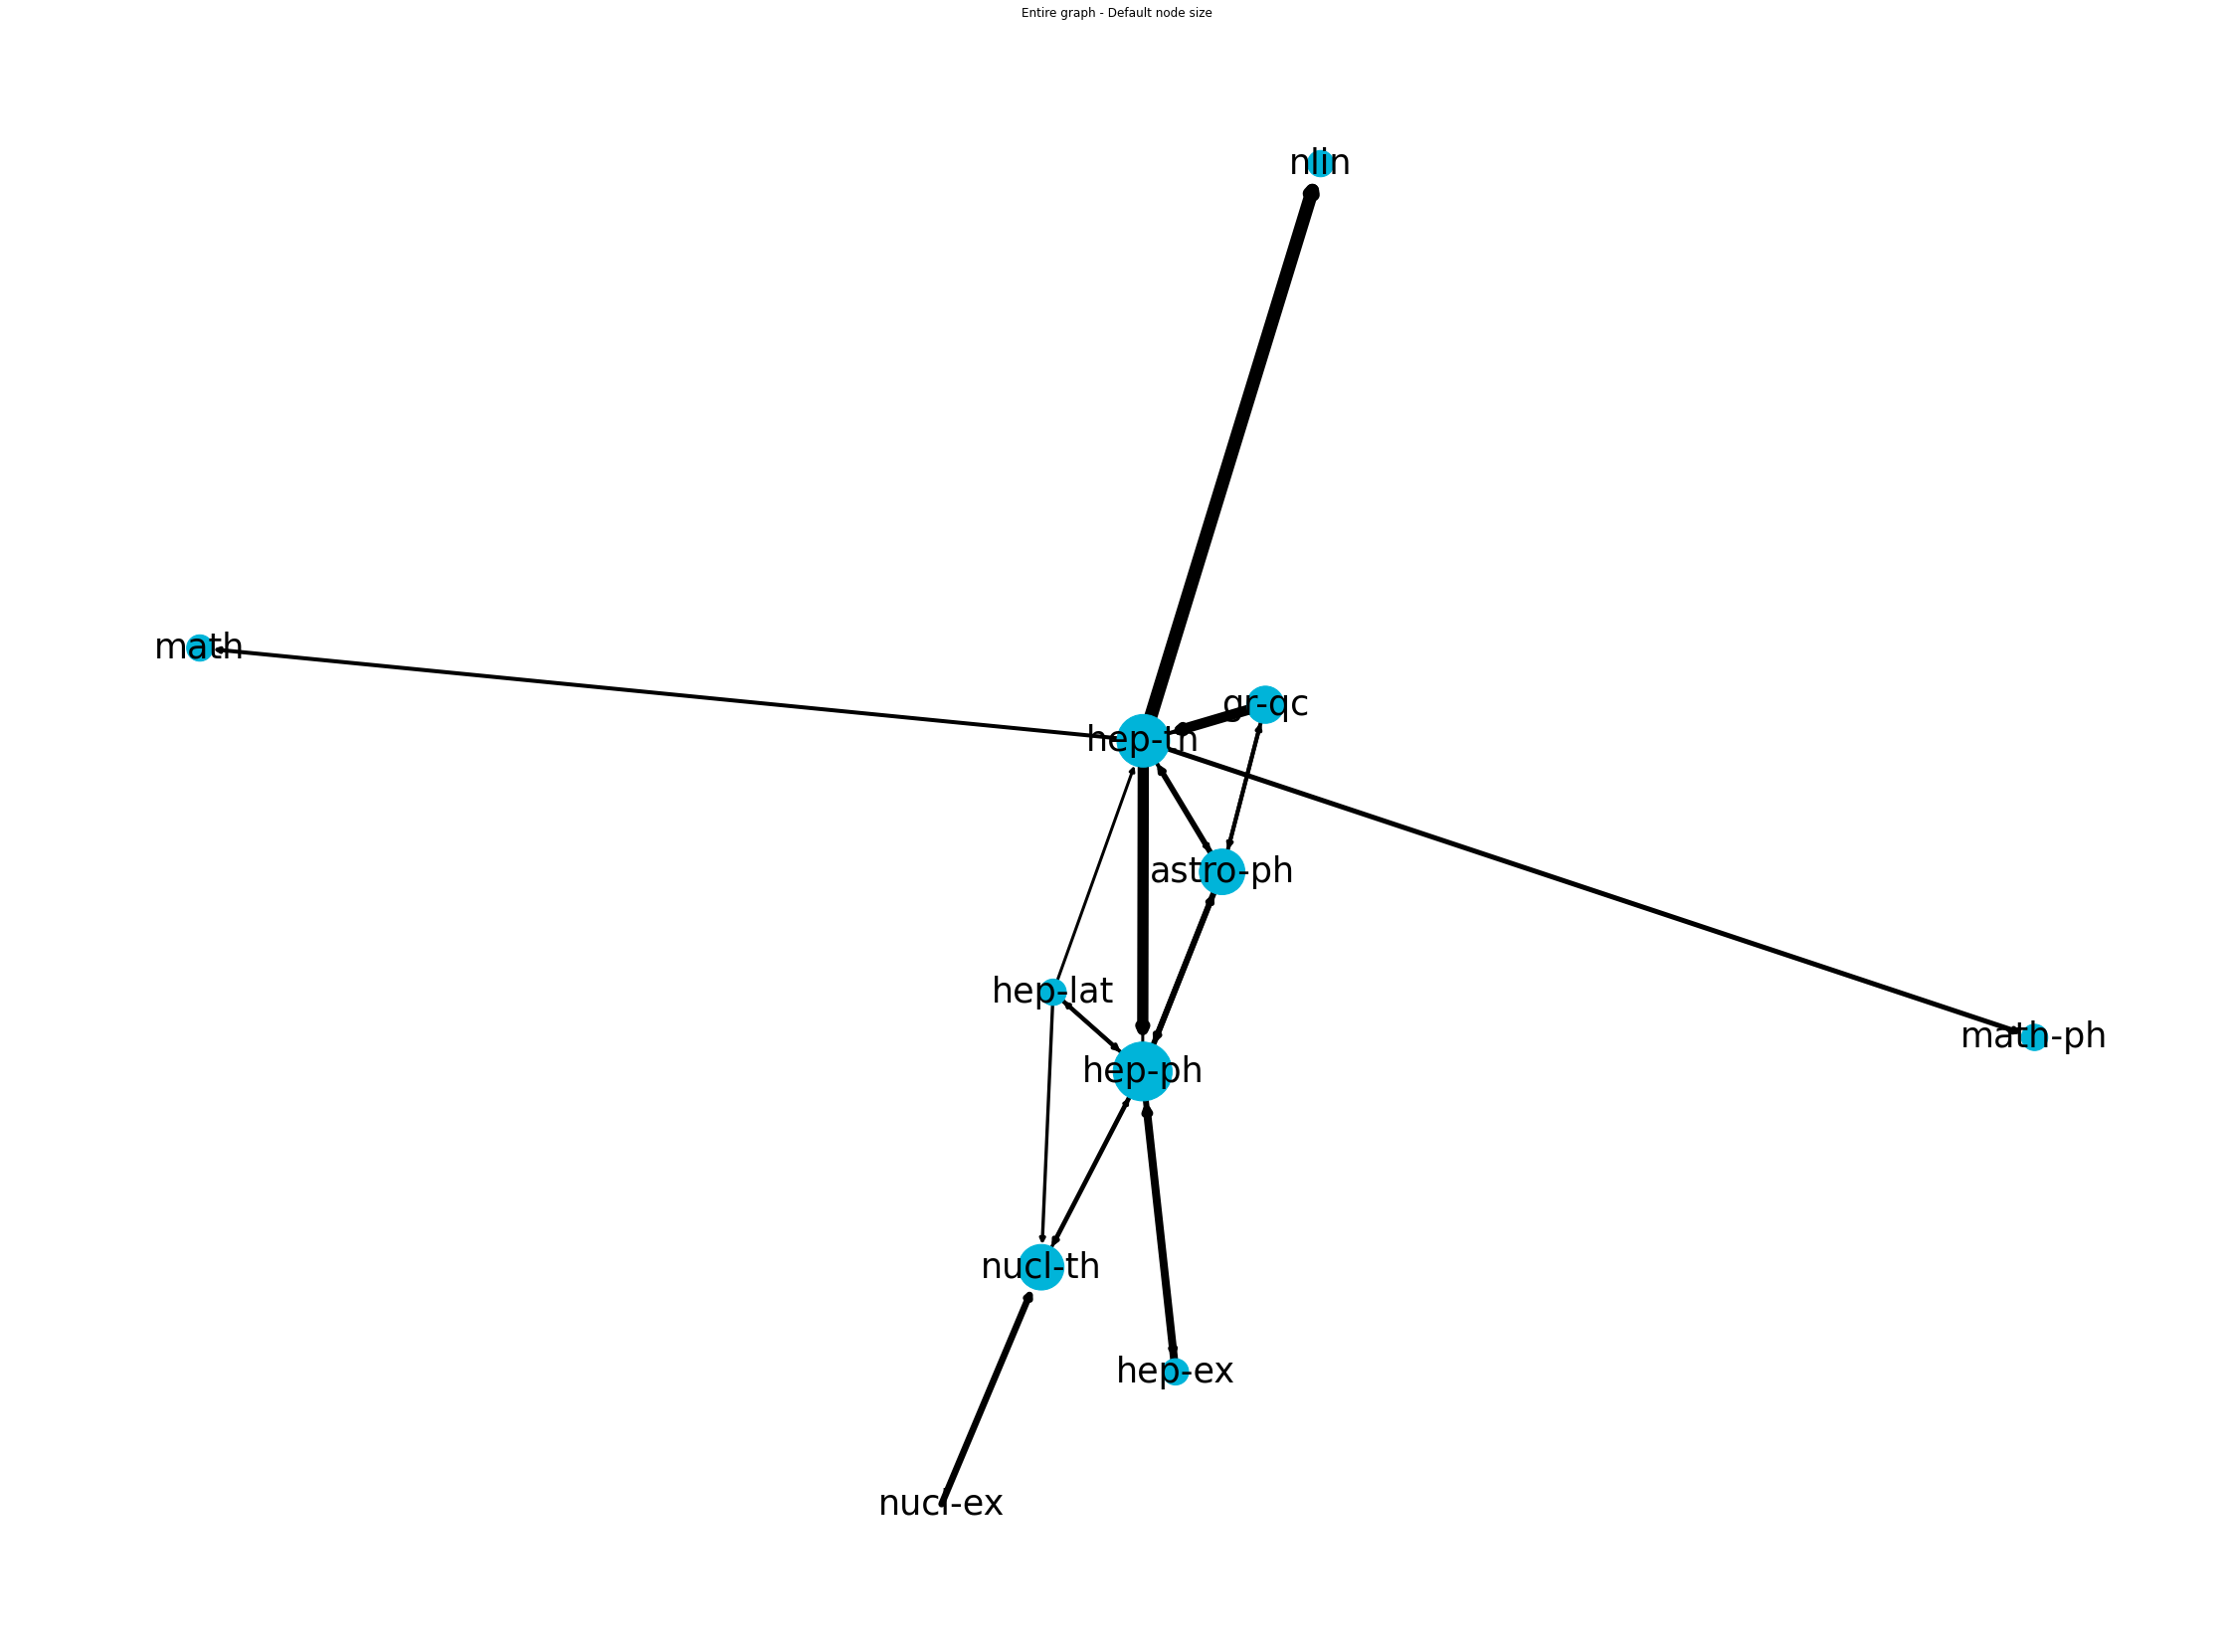

In [117]:
spring_pos = nx.spring_layout(GG_fields) # might take a little while
fig = plt.figure(figsize = (40, 30))
ax = fig.add_subplot(111)
ax.axis('off')

nx.draw_networkx(GG_fields,
                 spring_pos,
                 ax = ax,
                 node_color='#00b4d9',
                 node_size=[v*700 for v in dict(GG_fields.in_degree()).values()],
                 font_size=35,
                 with_labels=True,
                 width=list(2+df_fields["count"].values/3))
plt.title("Entire graph - Default node size")
plt.close();

fig

## Visualization of the Field Category Network using Cytoscape

The size of each node is a function of the centrality of the in degree and the width of each edge is a function of the count values

The Cytoscape file is located in the folder "cytoscape"

<p align="center">
<img src="cytoscape/fields_network.png" alt="Flowchart" width="800"/>
</p>

## References

- [Clement, C. B., Bierbaum, M., O’Keeffe, K. P., & Alemi, A. A. (2019). On the Use of ArXiv as a Dataset. arXiv [cs.IR]. Opgehaal van http://arxiv.org/abs/1905.00075](https://arxiv.org/pdf/1905.00075.pdf)


- [Clauset, A., Shalizi, C. R., & Newman, M. E. J. (2009). Power-Law Distributions in Empirical Data. SIAM Review, 51(4), 661–703. doi:10.1137/070710111](https://arxiv.org/pdf/0706.1062.pdf)


- [Page, L., Brin, S., Motwani, R., & Winograd, T. (1998). The PageRank Citation Ranking: Bringing Order to the Web.](http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf)